<a href="https://colab.research.google.com/github/waseda-ken/data_analyze_kikagaku/blob/main/%E3%83%87%E3%83%BC%E3%82%BF%E5%89%8D%E5%87%A6%E7%90%86.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## データ前処理

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
# データの読み込み
df = pd.read_csv('insurance.csv')
df.head(3)

,age,gender,bmi,children,smoker,region,rank,charges
0,19,female,27.90,0,yes,southwest,A,16884.924
1,18,male,33.77,1,no,southeast,NaN,NaN
2,28,male,33.00,3,no,southeast,NaN,NaN


## 重回帰分析の実装

In [ ]:
# データの形を確認
df.shape

(1338, 8)

In [ ]:
# 入力変数と出力変数の切り分け
t = df['charges'].values
x = df.drop(['charges'], axis=1).values

# 学習データとテストデータの切り分け
from sklearn.model_selection import train_test_split
x_train, x_test, t_train, t_test = train_test_split(x, t, test_size=0.3, random_state=1)

# モデルの宣言
from sklearn.linear_model import LinearRegression
model = LinearRegression()

# モデルの学習
model.fit(x_train, t_train)

ValueError: could not convert string to float: 'male'

## 重複行の確認

In [ ]:
df.duplicated(keep=False)
df.duplicated(keep=False).value_counts()


,count
False,1338


## 欠損値処理

In [ ]:
# 欠損値の確認
df.isnull()[:5] # [:5] で表示する行を指定

,age,gender,bmi,children,smoker,region,rank,charges
0,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,True,True
2,False,False,False,False,False,False,True,True
3,False,False,False,False,True,False,True,False
4,False,False,True,False,True,False,True,True


In [ ]:
# 欠損値の数を確認
df.isnull().sum()

,0
age,0
gender,0
bmi,77
children,0
smoker,92
region,0
rank,1296
charges,13


In [ ]:
# 削除前の shape の確認
df.shape

(1338, 8)

In [ ]:
df = df.dropna(subset=['charges'])

In [ ]:
# 削除後の shape の確認
df.shape

(1325, 8)

In [ ]:
df = df.drop(labels='rank', axis=1)

In [ ]:
df.shape


(1325, 7)

In [ ]:

df.head(3)


,age,gender,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
3,33,male,22.705,0,NaN,northwest,21984.47061
9,60,female,NaN,0,no,northwest,28923.13692


## 欠損値補完

In [ ]:
# 欠損値の確認
df.isnull().sum()

,0
age,0
gender,0
bmi,73
children,0
smoker,89
region,0
charges,0


In [ ]:
# データ統計量の確認
df.describe()


,age,bmi,children,charges
count,1325.000000,1252.000000,1325.000000,1325.000000
mean,39.314717,30.716434,1.096604,13363.042018
std,14.053463,6.156412,1.206614,12131.047621
min,18.000000,15.960000,0.000000,1121.873900
25%,27.000000,26.400000,0.000000,4779.602300
50%,40.000000,30.400000,1.000000,9447.382400
75%,51.000000,34.816250,2.000000,16884.924000
max,64.000000,53.130000,5.000000,63770.428010


(array([ 30., 120., 211., 301., 260., 195.,  86.,  32.,  14.,   3.]),
 array([15.96 , 19.677, 23.394, 27.111, 30.828, 34.545, 38.262, 41.979,
        45.696, 49.413, 53.13 ]),
 <BarContainer object of 10 artists>)

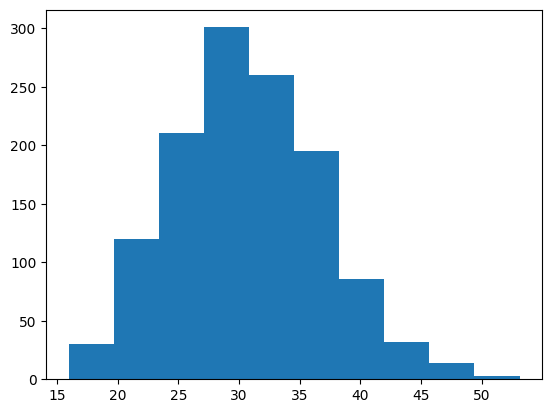

In [ ]:
plt.hist(df['bmi'])

In [ ]:
# 平均値の確認
df['bmi'].mean()

np.float64(30.71643370607029)

In [ ]:
# 欠損値を平均値で補完
df = df.fillna({'bmi':df['bmi'].mean()})

In [ ]:
# 欠損値の確認
df.isnull().sum()


,0
age,0
gender,0
bmi,0
children,0
smoker,89
region,0
charges,0


In [ ]:
df['smoker'].unique()


array(['yes', nan, 'no'], dtype=object)

In [ ]:
df['smoker'].mode()


,smoker
0,no


In [ ]:
df['smoker'].mode()[0]


'no'

In [ ]:
# 最頻値を使用して欠損値を補完
df = df.fillna({'smoker':df['smoker'].mode()[0]})

In [ ]:
df.isnull().sum()


,0
age,0
gender,0
bmi,0
children,0
smoker,0
region,0
charges,0


## カテゴリカル変数の取り扱い

In [ ]:
# カテゴリカル変数を含んだデータのみを抽出
df_obj = df.select_dtypes(include='object')
df_obj.head(3)

,gender,smoker,region
0,female,yes,southwest
3,male,no,northwest
9,female,no,northwest


In [ ]:
df_uni = df_obj.nunique()
df_uni


,0
gender,2
smoker,2
region,4


In [ ]:
for uni in df_obj.columns:
    print(uni)
    print(df_obj[uni].unique())

gender
['female' 'male']
smoker
['yes' 'no']
region
['southwest' 'northwest' 'southeast' 'northeast']


表記ゆれ
キカガク、KIKAGAKU、Kikagaku、きかがく


## Labal Encoding

In [ ]:
# モデルの宣言
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()

In [ ]:
le.fit(df['gender'])

LabelEncoder()

In [ ]:
# 適用
le.transform(df['gender'])

array([0, 1, 0, ..., 0, 0, 0])

In [ ]:
df['gender'] = le.transform(df['gender'])
df.head(3)

,age,gender,bmi,children,smoker,region,charges
0,19,0,27.900000,0,yes,southwest,16884.92400
3,33,1,22.705000,0,no,northwest,21984.47061
9,60,0,30.716434,0,no,northwest,28923.13692


In [ ]:
le.classes_


array(['female', 'male'], dtype=object)

In [ ]:
df_uni


,0
gender,2
smoker,2
region,4


In [ ]:
# ユニークな値が 2 種類の列名のみ取得
df_cols = df_uni[df_uni == 2].index
df_cols

Index(['gender', 'smoker'], dtype='object')

In [ ]:
for col in df_cols:
  le = LabelEncoder()
  le.fit(df[col])
  df[col] = le.transform(df[col])

In [ ]:
df.head(3)

,age,gender,bmi,children,smoker,region,charges
0,19,0,27.900000,0,1,southwest,16884.92400
3,33,1,22.705000,0,0,northwest,21984.47061
9,60,0,30.716434,0,0,northwest,28923.13692


## One-Hot Encoding

In [ ]:
df.shape


(1325, 7)

In [ ]:
df = pd.get_dummies(df, drop_first=True)
df.head(3)

,age,gender,bmi,children,smoker,charges,region_northwest,region_southeast,region_southwest
0,19,0,27.900000,0,1,16884.92400,False,False,True
3,33,1,22.705000,0,0,21984.47061,True,False,False
9,60,0,30.716434,0,0,28923.13692,True,False,False


In [ ]:
df.shape

(1325, 9)

## 前処理後のデータで重回帰分析を実装

In [ ]:
# 入力変数と出力変数の切り分け
t = df['charges'].values
x = df.drop(['charges'], axis=1).values

# 学習データとテストデータに分割
from sklearn.model_selection import train_test_split
x_train, x_test, t_train, t_test = train_test_split(x, t, test_size=0.3, random_state=1)

# モデルの宣言
from sklearn.linear_model import LinearRegression
model = LinearRegression()

# モデルの学習
model.fit(x_train, t_train)

LinearRegression()

In [ ]:
# モデルの検証
print('train score : ', model.score(x_train, t_train))
print('test score : ', model.score(x_test, t_test))

train score :  0.7499949702183968
test score :  0.744886018712194


In [ ]:
import pandas as pd

# データの読み込み（パスは適宜調整してください）
df = pd.read_csv('lego.csv')

# Q1: 'ages' の欠損値数
q1 = df['ages'].isna().sum()

# Q2: 'star_rating' の欠損値を中央値で補完し、補完後の平均を計算
median_star = df['star_rating'].median()
df['star_rating_filled'] = df['star_rating'].fillna(median_star)
q2 = round(df['star_rating_filled'].mean(), 1)

# Q3: 'country' に drop_first=True でワンホットエンコーディングをした際に増える列数
q3 = df['country'].nunique() -1

# 結果を表示
print("Q1. 欠損値の数（ages）:", q1)
print("Q2. 補完後の star_rating 平均（小数第一位）:", q2)
print("Q3. ワンホットエンコードで増える列数（country）:", q3)


Q1. 欠損値の数（ages）: 18
Q2. 補完後の star_rating 平均（小数第一位）: 4.5
Q3. ワンホットエンコードで増える列数（country）: 20
